In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
dt=pd.read_csv('social_network_ads.csv')

In [2]:
dt

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [3]:
dt["Gender"].replace({"Male":1,"Female":0}, inplace=True)
dt

C:\Users\Admin\AppData\Local\Temp\ipykernel_11036\3616749011.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dt["Gender"].replace({"Male":1,"Female":0}, inplace=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_11036\3616749011.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dt["Gender"].rep

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0
...,...,...,...,...,...
395,15691863,0,46,41000,1
396,15706071,1,51,23000,1
397,15654296,0,50,20000,1
398,15755018,1,36,33000,0


In [4]:
dt=dt.drop(columns="User ID")

In [5]:
dt.columns

Index(['Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [6]:
dt.describe()

,Gender,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000,400.000000
mean,0.490000,37.655000,69742.500000,0.357500
std,0.500526,10.482877,34096.960282,0.479864
min,0.000000,18.000000,15000.000000,0.000000
25%,0.000000,29.750000,43000.000000,0.000000
50%,0.000000,37.000000,70000.000000,0.000000
75%,1.000000,46.000000,88000.000000,1.000000
max,1.000000,60.000000,150000.000000,1.000000


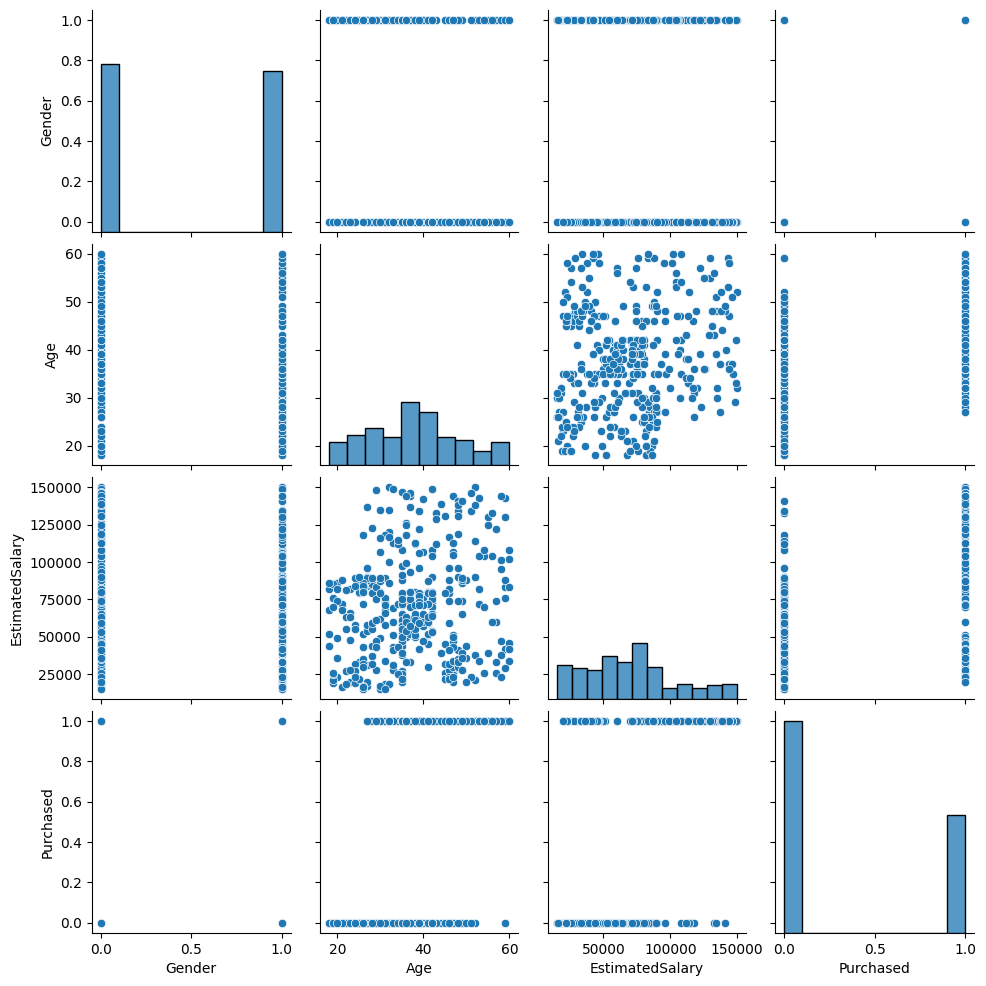

In [7]:
sns.pairplot(dt)
plt.show()

In [8]:
x=dt[['Gender', 'Age', 'EstimatedSalary']]
y=dt['Purchased']

In [9]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

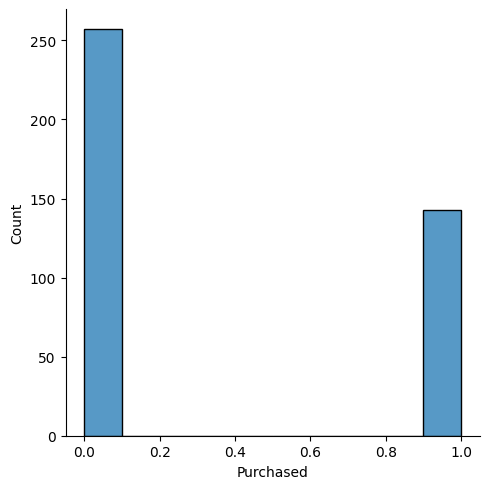

In [10]:
sns.displot(dt["Purchased"])

<Axes: >

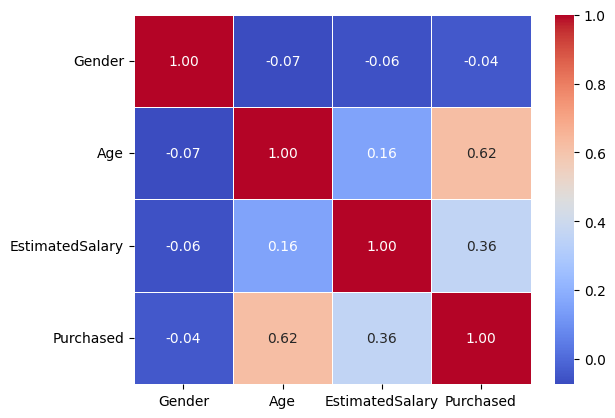

In [11]:
corr_matrix=dt.corr()
sns.heatmap(corr_matrix,annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)
x_train

,Gender,Age,EstimatedSalary
250,0,44,39000
63,1,32,120000
312,0,38,50000
159,0,32,135000
283,0,52,21000
...,...,...,...
323,0,48,30000
192,1,29,43000
117,1,36,52000
47,0,27,54000


In [14]:
print(y)

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64


In [15]:
y_train

250    0
63     1
312    0
159    1
283    1
      ..
323    1
192    0
117    0
47     0
172    0
Name: Purchased, Length: 300, dtype: int64

In [17]:
model=LogisticRegression()
model.fit(x_train,y_train)

C:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [18]:
y_pred = model.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1])

<Axes: >

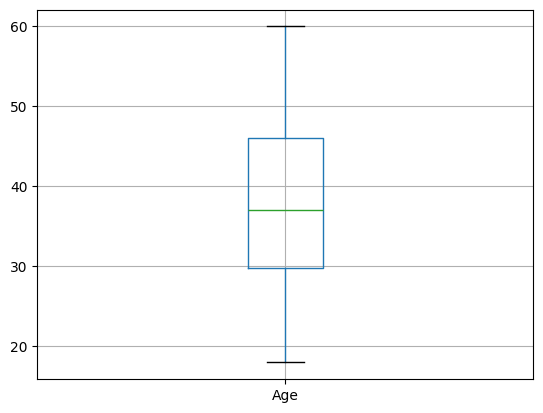

In [19]:
col = ["Age"]
dt.boxplot(col)

In [20]:
model.score(x_train,y_train)

0.8233333333333334

In [21]:
model.score(x_test,y_test)

0.89

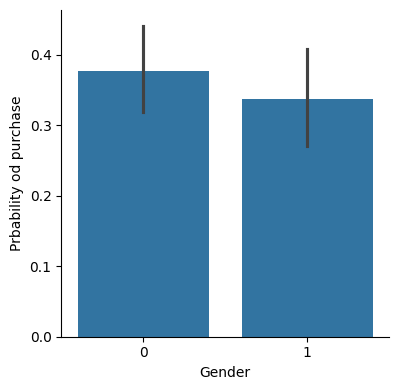

In [22]:
c=sns.catplot(x="Gender",y="Purchased", data=dt,kind="bar",height=4)
c.set_ylabels("Prbability od purchase")

In [23]:
ct = pd.crosstab(dt["Gender"],dt["Purchased"],normalize="index")
print(ct)

Purchased         0         1
Gender                       
0          0.622549  0.377451
1          0.663265  0.336735


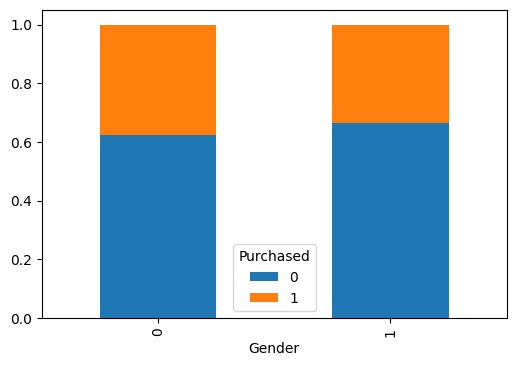

In [24]:
ct.plot.bar(figsize=(6,4), stacked=True)
plt.show()

In [25]:
from sklearn.metrics import precision_score, confusion_matrix, accuracy_score, recall_score
cm=confusion_matrix(y_test,y_pred)
cm

array([[64,  4],
       [ 7, 25]])

In [26]:
tn,fp,tp,fn=confusion_matrix(y_test,y_pred).ravel()
a=accuracy_score(y_test,y_pred)    #tp+tn/total values
print("Accuracy score:",a)

Accuracy score: 0.89


In [27]:
r=recall_score(y_test,y_pred)
print("Recall score:",r)

Recall score: 0.78125


In [28]:
p=precision_score(y_test,y_pred)
print("Precision score:",p)

Precision score: 0.8620689655172413


In [29]:
e=1-a
print("Error rate:",e)

Error rate: 0.10999999999999999
